In [2]:
#loading required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
#dataset processing methods
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.pipeline import Pipeline
from scipy.stats import ranksums
from scipy.stats import pearsonr
#loading regression methods
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression as lor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression as lr
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as qda
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.svm import SVC as svc
from sklearn.svm import NuSVC as nusvc
from sklearn.svm import LinearSVC as lsvc
from sklearn.svm import LinearSVR as lsvr
import xgboost as xgb
#evaluation methods
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score,roc_auc_score,precision_score,recall_score



In [3]:
# principle components from sklearn
from sklearn.decomposition import PCA

In [4]:
df_BR4_meta = pd.read_csv('BR4_meta.csv')

In [5]:
df_BR4_meta.head()

,Unnamed: 0,Age,ER_Status,PR_Status,HER2_Status,Grade,T_Stage,N_Stage,PAM50_Class,DRFS_Event,DRFS_Year,ChemoResponse
0,GSM505409,67.0,positive,negative,negative,3.0,T4,NaN,NaN,NaN,NaN,Resistant
1,GSM615248,42.0,positive,positive,negative,3,T3,N1,pam50_class: Basal,drfs_1_event_0_censored: 0,drfs_even_time_years: 3.214,Resistant
2,GSM505381,39.0,negative,negative,positive,3.0,T4,NaN,NaN,NaN,NaN,Resistant
3,GSM505397,54.0,positive,positive,negative,2.0,T3,NaN,NaN,NaN,NaN,Resistant
4,GSM505587,52.0,positive,positive,negative,1.0,T2,NaN,NaN,NaN,NaN,Resistant


In [37]:
df_BR4_meta.isnull().sum()

Unnamed: 0         0
Age               22
ER_Status          0
PR_Status          0
HER2_Status        0
Grade            149
T_Stage           23
N_Stage          415
PAM50_Class      592
DRFS_Event       683
DRFS_Year        683
ChemoResponse      0
dtype: int64

In [6]:
df_BR4_data = pd.read_csv('BR4_data.csv')

In [7]:
df_BR4_data.head()

,Unnamed: 0,MIR4640///DDR1,RFC2,HSPA6,PAX8,GUCA1A,MIR5193///UBA7,THRA,PTPN21,CCL5,...,MROH7TTC4///TTC4,RBM12B,ZGPAT///LIME1,LOC102725263///LOC389906,LOC100129924///C1orf50,FAM86DP///FAM86B2///FAM86FP///FAM86B1///FAM86C1,SNHG17,HNRNPUL2BSCL2///HNRNPUL2,LOC100505915,NPEPL1
0,GSM505409,11.977600,8.764900,7.148100,10.528500,5.795200,8.215000,7.358800,6.792200,5.766800,...,8.373400,6.55470,7.862800,10.167500,8.7054,8.037100,8.760700,6.862300,3.951800,7.740100
1,GSM615248,11.016568,9.092555,8.356845,10.397691,6.222572,9.846374,7.807232,7.774217,12.463638,...,9.361736,7.62508,9.500917,8.763428,9.5838,7.339963,9.379185,8.027029,4.644416,8.831574
2,GSM505381,12.538100,7.984900,7.968900,10.248200,4.261200,7.929900,7.130400,7.056600,8.259800,...,8.645100,6.08060,7.821100,8.201500,8.9356,7.450600,7.806100,7.498400,4.712000,9.538200
3,GSM505397,11.903500,7.375100,8.244600,11.237000,5.635600,10.528400,9.487200,7.016600,9.117100,...,9.553200,7.52090,9.696000,9.110200,9.6490,7.737100,8.820300,9.013100,7.614500,9.597400
4,GSM505587,12.149900,7.834700,5.301900,10.931000,6.662000,9.036900,7.988300,7.765200,6.456200,...,8.494300,6.93000,8.005300,8.503100,8.7900,8.913800,7.959900,6.933500,7.500800,7.062900


In [8]:
df=pd.concat([df_BR4_data,df_BR4_meta.iloc[:,1:]],axis=1)

In [9]:
df.head()

,Unnamed: 0,MIR4640///DDR1,RFC2,HSPA6,PAX8,GUCA1A,MIR5193///UBA7,THRA,PTPN21,CCL5,...,ER_Status,PR_Status,HER2_Status,Grade,T_Stage,N_Stage,PAM50_Class,DRFS_Event,DRFS_Year,ChemoResponse
0,GSM505409,11.977600,8.764900,7.148100,10.528500,5.795200,8.215000,7.358800,6.792200,5.766800,...,positive,negative,negative,3.0,T4,NaN,NaN,NaN,NaN,Resistant
1,GSM615248,11.016568,9.092555,8.356845,10.397691,6.222572,9.846374,7.807232,7.774217,12.463638,...,positive,positive,negative,3,T3,N1,pam50_class: Basal,drfs_1_event_0_censored: 0,drfs_even_time_years: 3.214,Resistant
2,GSM505381,12.538100,7.984900,7.968900,10.248200,4.261200,7.929900,7.130400,7.056600,8.259800,...,negative,negative,positive,3.0,T4,NaN,NaN,NaN,NaN,Resistant
3,GSM505397,11.903500,7.375100,8.244600,11.237000,5.635600,10.528400,9.487200,7.016600,9.117100,...,positive,positive,negative,2.0,T3,NaN,NaN,NaN,NaN,Resistant
4,GSM505587,12.149900,7.834700,5.301900,10.931000,6.662000,9.036900,7.988300,7.765200,6.456200,...,positive,positive,negative,1.0,T2,NaN,NaN,NaN,NaN,Resistant


In [10]:
print(df.dtypes)

Unnamed: 0         object
MIR4640///DDR1    float64
RFC2              float64
HSPA6             float64
PAX8              float64
                   ...   
N_Stage            object
PAM50_Class        object
DRFS_Event         object
DRFS_Year          object
ChemoResponse      object
Length: 13311, dtype: object


In [11]:
floatcols=df.dtypes=="float64"
Df=df.loc[:,floatcols]

In [12]:
Df.head()

,MIR4640///DDR1,RFC2,HSPA6,PAX8,GUCA1A,MIR5193///UBA7,THRA,PTPN21,CCL5,CYP2E1,...,RBM12B,ZGPAT///LIME1,LOC102725263///LOC389906,LOC100129924///C1orf50,FAM86DP///FAM86B2///FAM86FP///FAM86B1///FAM86C1,SNHG17,HNRNPUL2BSCL2///HNRNPUL2,LOC100505915,NPEPL1,Age
0,11.977600,8.764900,7.148100,10.528500,5.795200,8.215000,7.358800,6.792200,5.766800,6.094200,...,6.55470,7.862800,10.167500,8.7054,8.037100,8.760700,6.862300,3.951800,7.740100,67.0
1,11.016568,9.092555,8.356845,10.397691,6.222572,9.846374,7.807232,7.774217,12.463638,6.657971,...,7.62508,9.500917,8.763428,9.5838,7.339963,9.379185,8.027029,4.644416,8.831574,42.0
2,12.538100,7.984900,7.968900,10.248200,4.261200,7.929900,7.130400,7.056600,8.259800,6.480800,...,6.08060,7.821100,8.201500,8.9356,7.450600,7.806100,7.498400,4.712000,9.538200,39.0
3,11.903500,7.375100,8.244600,11.237000,5.635600,10.528400,9.487200,7.016600,9.117100,7.247000,...,7.52090,9.696000,9.110200,9.6490,7.737100,8.820300,9.013100,7.614500,9.597400,54.0
4,12.149900,7.834700,5.301900,10.931000,6.662000,9.036900,7.988300,7.765200,6.456200,6.421200,...,6.93000,8.005300,8.503100,8.7900,8.913800,7.959900,6.933500,7.500800,7.062900,52.0


In [13]:
print(Df.dtypes)

MIR4640///DDR1              float64
RFC2                        float64
HSPA6                       float64
PAX8                        float64
GUCA1A                      float64
                             ...   
SNHG17                      float64
HNRNPUL2BSCL2///HNRNPUL2    float64
LOC100505915                float64
NPEPL1                      float64
Age                         float64
Length: 13300, dtype: object


In [14]:
Df.isnull().sum()

MIR4640///DDR1               0
RFC2                         0
HSPA6                        0
PAX8                         0
GUCA1A                       0
                            ..
SNHG17                       0
HNRNPUL2BSCL2///HNRNPUL2     0
LOC100505915                 0
NPEPL1                       0
Age                         22
Length: 13300, dtype: int64

In [15]:
Df=Df.drop('Age',axis=1)

In [16]:
#preprocess object to dummies
ER_Status_dummies=pd.get_dummies(df["ER_Status"],drop_first=True,prefix="ER_Status")
PR_Status_dummies=pd.get_dummies(df["PR_Status"],drop_first=True,prefix="PR_Status")                
HER2_Status_dummies=pd.get_dummies(df["HER2_Status"],drop_first=True,prefix="HER2_Status") 
T_Stage_dummies=pd.get_dummies(df["T_Stage"],drop_first=True,prefix="T_Stage")


In [17]:
dummy=pd.concat([ER_Status_dummies,PR_Status_dummies,HER2_Status_dummies,T_Stage_dummies],axis=1)

In [18]:
#OneHot
x=pd.concat([df["ER_Status"],df["PR_Status"],df["HER2_Status"],df["T_Stage"]],axis=1)
enc=OneHotEncoder(sparse = False)
one=enc.fit_transform(x)

In [20]:
p=pd.DataFrame(one)

In [21]:
p.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000
mean,0.415884,0.578992,0.005124,0.538856,0.455167,0.005978,0.865073,0.120410,0.014518,0.006832,0.059778,0.529462,0.222032,0.161401,0.000854,0.019641
std,0.493084,0.493932,0.071428,0.498701,0.498199,0.077118,0.341792,0.325579,0.119662,0.082407,0.237176,0.499344,0.415790,0.368057,0.029223,0.138824
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
def MI(df,Y):
    """
    mutual information
    -----
    input: dataframe, y
    -----
    output: dict{(variable1:mi),(variable2:mi)}
    """
    r = {}
    from sklearn.feature_selection import mutual_info_regression
    index = mutual_info_regression(Df,Y.values.ravel())
    i=0
    for col in df.columns:
        r[col] = index[i]
        i+=1
    r = dict(sorted(r.items(), key=lambda x: np.abs(x[1]), reverse=True)) 
    return r

In [23]:
def inform(data):
    df=pd.DataFrame(data)
    stats = df.describe()
    # Print statistics for each column
    for col in stats.columns:
        print("Col:", col)
        print("Mean:", stats.loc['mean', col])
        print("Standard Deviation:", stats.loc['std', col])
        print("Minimum Value:", stats.loc['min', col])
        print("25th Percentile:", stats.loc['25%', col])
        print("Median:", stats.loc['50%', col])
        print("75th Percentile:", stats.loc['75%', col])
        print("Maximum Value:", stats.loc['max', col])
        print("")




In [24]:
def wilcoxon(df,Y):
    """
    Wilcoxon ranksum
    split the variable whose y=1 and y=0 as a pair, doing ranksum test on each variable pair.
    save the variables and its p value
    -----
    input: dataframe, y
    -----
    output: dict{(variable1:p-value),(variable2:p-value)}
    
    """
    r = {}
    for col in df.columns: # For all columns in features data frame
        x, y = [], [] # initialize lists for comparisons
        for val in range(len(df.T.columns)): 
            if Y.values[val] == 1: # Take all gene expression data for prognosis = 1
                x.append(df[col][val]) 
            elif Y.values[val] == 0: # Take all gene expression data for prognosis = 0
                y.append(df[col][val])
        w, p = ranksums(x, y) # Perform rank-sum test for x and y
        r[col] = p # Append key:val pair to dictionary
    # Sort entries by most statistically significant
    r = dict(sorted(r.items(), key=lambda x: np.abs(x[1]), reverse=False)) 
    return r
            
        

In [25]:
'''mi=MI(Df,Y)'''
'''
sel_mi={}
val_mi=[]
for i in mi:
    if r[i]>0.0001:
        #select the variables whose p value <0.005 as independent variables
        sel_mi[i]=r[i]
        val_mi.append(i)
x_ml=Df.loc[:,val_mi]
'''
'''r2=wilcoxon(x_ml,Y)'''
'''m=MI(x_wilpear,Y)'''

'm=MI(x_wilpear,Y)'

In [26]:
Y=pd.get_dummies(df["ChemoResponse"],drop_first=True,prefix="ChemoResponse")
r=wilcoxon(Df,Y)

In [27]:
sel={}
val=[]
alpha_corrected = 0.05 / 10
for i in r:
    if r[i]<alpha_corrected:
        #select the variables whose p value <0.005 as independent variables
        sel[i]=r[i]
        val.append(i)
x_wil=Df.loc[:,val]

In [35]:
x_wil.head()

,ESR1,RARRES1,CYP2B7P///CYP2B6,DNAJC12,TTK,DEK,MELK,TSPAN1,SLC7A8,MCM5,...,CACNA2D3,SDHAP2///SDHAP1,REST,POGK,GJC2,PYY,ACTL7A,ZFP69B,PAGE4,CSRNP2
0,12.513100,3.129200,14.035600,11.800400,7.727900,10.85800,9.833100,9.078600,6.447900,4.905400,...,3.565200,10.547500,7.534900,9.966400,5.050100,3.361400,4.356700,1.567800,6.085800,8.465000
1,8.936296,11.629441,5.911895,5.254161,9.493873,12.39223,11.057332,8.443357,8.036227,9.631864,...,5.863753,11.316579,8.242564,10.262065,6.174758,3.419534,3.788779,7.754157,7.447297,8.847242
2,7.969500,7.384600,7.397900,9.067200,8.366700,11.12960,9.198100,12.164400,8.415100,6.903000,...,4.320400,10.837200,6.849700,9.760200,6.677000,5.544600,4.324800,6.147700,6.330700,9.044300
3,11.792700,10.062500,12.634900,10.133400,7.486100,8.60290,6.754500,7.905100,8.638700,5.001600,...,5.166900,10.473500,9.776600,6.423300,7.489000,6.960600,7.759800,7.636300,8.642300,8.376800
4,13.012400,6.304800,11.687800,11.437000,6.814000,10.68680,6.801000,8.900000,10.534100,6.295600,...,5.676000,10.673800,6.589100,10.010000,6.097400,2.850600,4.523400,6.203000,6.494400,8.711400


In [38]:
x_wil.corr()

,ESR1,RARRES1,CYP2B7P///CYP2B6,DNAJC12,TTK,DEK,MELK,TSPAN1,SLC7A8,MCM5,...,CACNA2D3,SDHAP2///SDHAP1,REST,POGK,GJC2,PYY,ACTL7A,ZFP69B,PAGE4,CSRNP2
ESR1,1.000000,-0.493874,0.643665,0.724875,-0.365020,-0.180991,-0.252676,0.512628,0.487501,-0.361491,...,-0.053648,0.178211,-0.080833,0.122621,-0.149839,0.002216,-0.173474,-0.016086,0.041342,0.411269
RARRES1,-0.493874,1.000000,-0.447219,-0.477976,0.257110,0.344882,0.249392,-0.456108,-0.361437,0.333681,...,0.024486,0.076482,0.034243,0.099357,-0.096790,-0.156702,-0.132111,0.155004,-0.060774,-0.095357
CYP2B7P///CYP2B6,0.643665,-0.447219,1.000000,0.532212,-0.248188,-0.300628,-0.222861,0.456950,0.440773,-0.324852,...,0.047351,-0.000564,-0.024011,-0.014749,0.055406,0.120130,0.059886,-0.107631,0.110764,0.212302
DNAJC12,0.724875,-0.477976,0.532212,1.000000,-0.337645,-0.260865,-0.269927,0.571915,0.441934,-0.377237,...,-0.042345,0.021061,-0.106277,0.030788,-0.067241,0.056594,-0.023609,-0.091291,0.048173,0.245442
TTK,-0.365020,0.257110,-0.248188,-0.337645,1.000000,0.318848,0.662302,-0.178218,-0.354866,0.401306,...,-0.043235,0.170065,-0.132131,0.259046,0.077003,0.137224,0.077587,0.157768,0.092731,0.080434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PYY,0.002216,-0.156702,0.120130,0.056594,0.137224,-0.369169,-0.018368,0.179882,0.070558,-0.057548,...,0.154649,-0.184716,0.051111,-0.192503,0.437519,1.000000,0.494453,-0.132472,0.284846,-0.069449
ACTL7A,-0.173474,-0.132111,0.059886,-0.023609,0.077587,-0.573717,-0.252269,0.119433,0.128706,-0.078506,...,0.311285,-0.549902,0.262629,-0.490126,0.718547,0.494453,1.000000,-0.192697,0.352148,-0.351658
ZFP69B,-0.016086,0.155004,-0.107631,-0.091291,0.157768,0.268817,0.270729,-0.162570,-0.039812,0.057927,...,0.094848,0.208643,0.138097,0.181682,-0.141343,-0.132472,-0.192697,1.000000,0.102990,0.267952
PAGE4,0.041342,-0.060774,0.110764,0.048173,0.092731,-0.249484,-0.030884,0.108212,0.068169,-0.045844,...,0.197091,-0.003703,0.172965,-0.115079,0.340130,0.284846,0.352148,0.102990,1.000000,0.111630


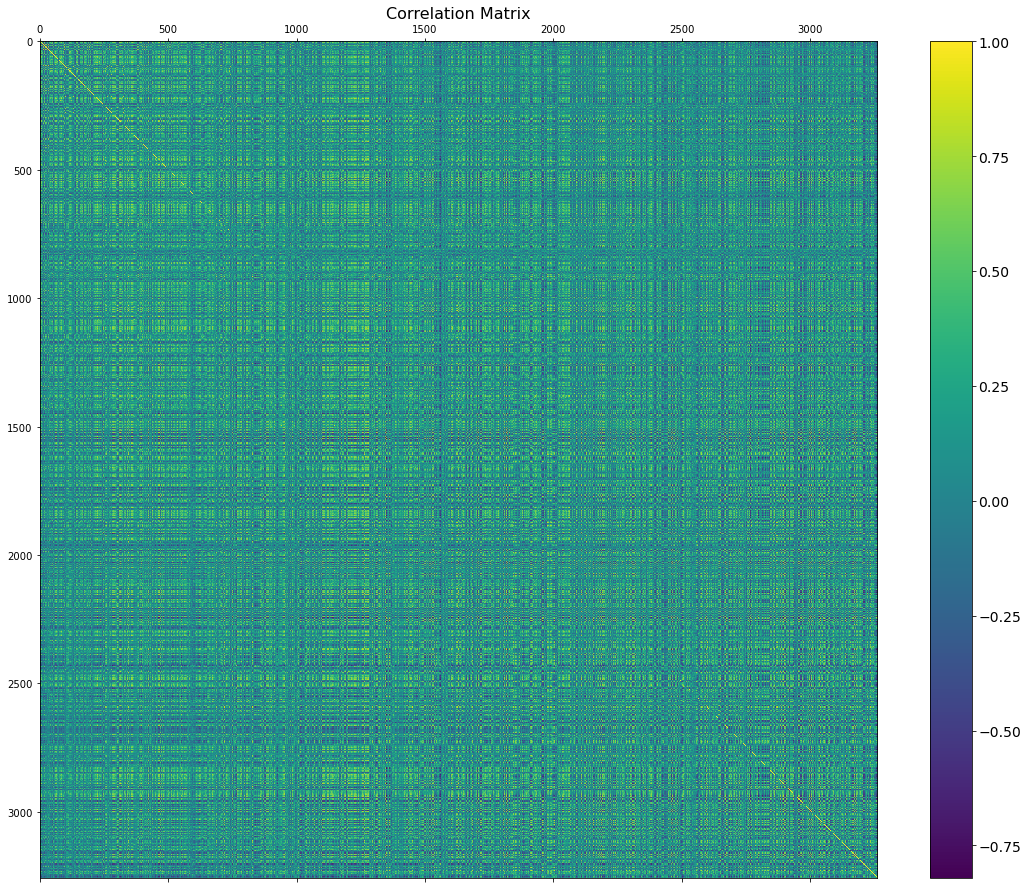

In [30]:
f = plt.figure(figsize=(19, 15))
plt.matshow(x_wil.corr(), fignum=f.number)
#plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
#plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [31]:
def deletehighcorr(df,val):
    """
     Calculate pearson correlation
     Delete high correlation variables
     ----
     input data,variables name list
     ouput new variables name list
     ----
    """
    se=val
    for col0 in se:
        for col1 in se:
            r, p=pearsonr(df[col0],df[col1])
            if abs(r)>0.4 and abs(r)!=1:
                se.remove(col1)
    return se
    

In [32]:
s=deletehighcorr(x_wil,val)
x_wilpear=Df.loc[:,s]

In [33]:
x_wilpear.corr()

,MCM5,TFF1,KCNE4,ELF5,CXCL13,RPL39L,RAP2B///RAP2A,GALNT3,BCAM,RGS11,...,PTP4A3,TM7SF2,ZNF385D,LOC101930416///LOC101929792///LOC100996724///PDE4DIP,TAC1,PSMC2,KLHL26,P2RY2,CACNA2D3,PYY
MCM5,1.000000,-0.345035,-0.217793,0.331689,0.221173,0.310319,0.297124,0.168751,-0.141760,-0.153978,...,0.209746,-0.177378,-0.016572,-0.040336,-0.212780,0.009966,-0.058983,0.081625,0.016440,-0.057548
TFF1,-0.345035,1.000000,0.357062,-0.387461,-0.218351,-0.275812,-0.259663,-0.224260,0.364016,0.308372,...,-0.151220,0.357921,0.037483,0.030005,0.185933,0.143003,0.324801,0.081642,0.000292,0.137281
KCNE4,-0.217793,0.357062,1.000000,-0.199191,-0.224008,-0.158216,-0.216793,-0.242505,0.283837,0.291952,...,-0.170301,0.137305,0.073280,0.100614,0.111547,0.239182,0.170980,0.138432,0.176178,0.133038
ELF5,0.331689,-0.387461,-0.199191,1.000000,0.096242,0.275826,0.262454,0.194676,-0.199324,-0.127845,...,0.216149,-0.189158,0.046006,-0.074883,-0.017099,-0.097889,-0.122348,-0.061579,0.116363,0.028584
CXCL13,0.221173,-0.218351,-0.224008,0.096242,1.000000,0.145175,0.132994,0.175410,-0.209790,-0.175168,...,0.115201,-0.130631,0.013912,0.117244,-0.060605,-0.028523,-0.125516,-0.102800,-0.021477,-0.146553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSMC2,0.009966,0.143003,0.239182,-0.097889,-0.028523,0.004677,0.070681,-0.018860,0.089283,0.156156,...,0.003309,0.163550,-0.106195,0.105160,0.081290,1.000000,0.198098,0.039685,0.018076,0.075067
KLHL26,-0.058983,0.324801,0.170980,-0.122348,-0.125516,-0.098652,-0.003561,-0.146594,0.330698,0.231662,...,0.033299,0.323272,-0.018478,0.033822,0.136467,0.198098,1.000000,0.009601,0.015959,0.244113
P2RY2,0.081625,0.081642,0.138432,-0.061579,-0.102800,0.135004,-0.085804,0.002144,0.272541,0.121554,...,-0.086273,0.043567,0.145606,0.033242,-0.148698,0.039685,0.009601,1.000000,0.111582,0.024813
CACNA2D3,0.016440,0.000292,0.176178,0.116363,-0.021477,-0.045938,-0.050997,-0.091279,0.139903,0.055041,...,-0.056471,-0.154018,0.355792,0.142201,0.101992,0.018076,0.015959,0.111582,1.000000,0.154649


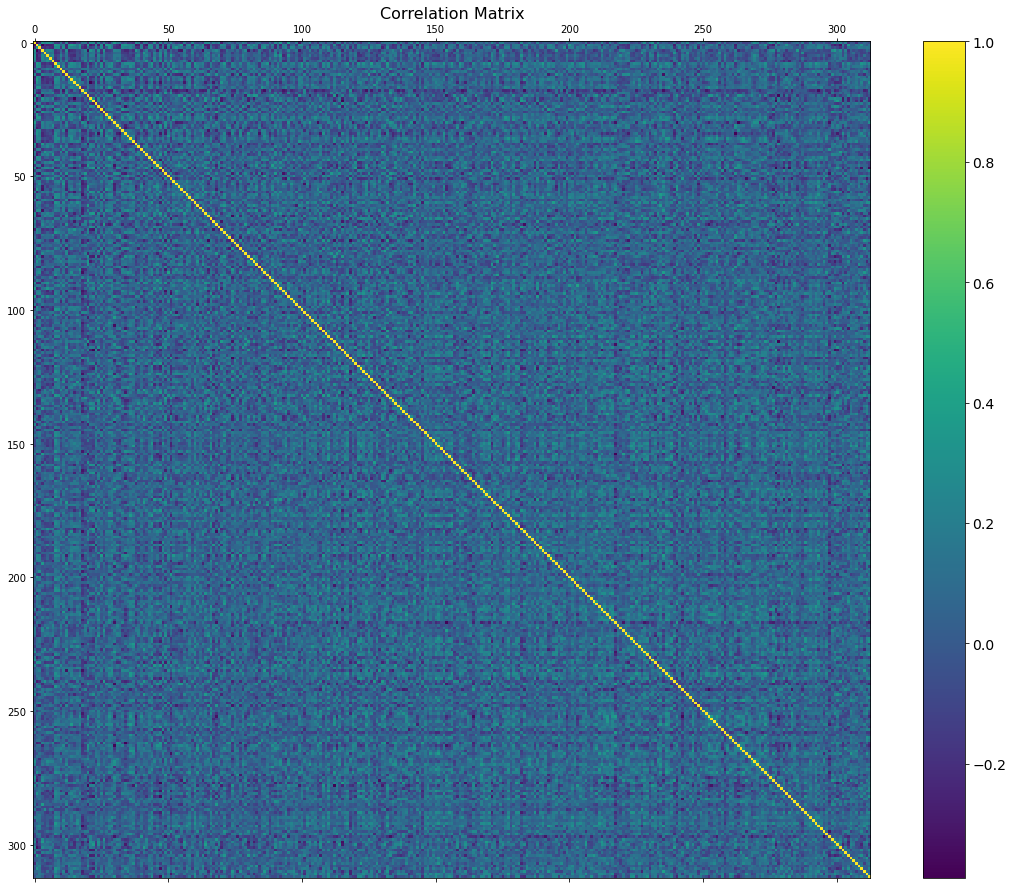

In [34]:
f = plt.figure(figsize=(19, 15))
plt.matshow(x_wilpear.corr(), fignum=f.number)
#plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
#plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [103]:
np.std(x_wilpear.values)

2.0018428115559157

In [95]:
x_wilpear.describe()

,MCM5,TFF1,KCNE4,ELF5,CXCL13,RPL39L,RAP2B///RAP2A,GALNT3,BCAM,RGS11,...,PTP4A3,TM7SF2,ZNF385D,LOC101930416///LOC101929792///LOC100996724///PDE4DIP,TAC1,PSMC2,KLHL26,P2RY2,CACNA2D3,PYY
count,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,...,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000
mean,6.909987,10.140482,7.235527,5.687331,8.113400,7.911837,7.210296,8.821730,6.840878,5.367744,...,7.525313,8.025131,5.644533,7.622836,5.027595,8.601441,7.111943,6.296518,5.751707,4.685448
std,1.519715,2.976705,2.048271,2.198213,2.461402,1.513133,1.131784,1.581470,1.192294,1.493731,...,1.138804,1.222633,1.460512,1.025147,1.663206,0.929008,0.914443,1.473950,1.298195,1.721058
min,2.913300,0.956475,2.153142,-0.161548,2.062700,1.778900,1.712210,1.918100,3.080305,0.200105,...,2.862200,3.417360,0.974900,3.210500,-2.035815,4.224121,1.111096,1.405962,-0.359173,-1.008137
25%,5.929866,7.943096,5.744470,3.840636,6.262998,7.320924,6.756923,8.002357,5.802087,4.262814,...,6.992707,7.269262,4.534749,7.014216,4.001759,8.223119,6.466003,5.097635,4.736155,3.389689
50%,7.101400,9.913081,7.186372,5.326843,8.023080,8.167444,7.301935,9.071151,7.125951,5.310746,...,7.543538,7.934640,5.847386,7.784131,5.302735,8.699150,7.208800,6.523157,5.630000,4.681500
75%,7.990713,12.654743,8.705133,7.039188,9.878112,8.914069,7.929355,9.818751,7.675473,6.260764,...,8.203887,8.871839,6.683151,8.317226,6.188314,9.203450,7.758808,7.307181,6.875384,6.116144
max,10.562196,16.904924,13.170900,12.674077,14.693600,11.491413,9.873423,12.195265,10.873794,10.121715,...,11.945039,11.661800,10.159604,10.461566,10.669262,10.694533,9.659154,11.119924,10.565248,8.725256


In [28]:
x_wilpear.to_csv("preprocess-data.csv",index=False)

In [29]:
# Add the dummy variables one by one to calculate the error,based on parameter above
def variables_selection(X,Y,model):
    X_train, X_test,y_train,y_test=train_test_split(X,Y.values.ravel(),test_size=0.2,random_state=21)
    X_train=X_train.values
    X_test=X_test.values
    error=[]
    parameter=[]
    acu=0
    X_sitrain=np.zeros(X_train.shape[0]).reshape(-1,1)
    X_sitest=np.zeros(X_test.shape[0]).reshape(-1,1)
    while (X_train.shape[1]>0):
        for i in range(X_train.shape[1]):
            X_strain=np.append(X_sitrain,X_train[:,i].reshape(-1,1),axis=1)
            X_stest=np.append(X_sitest,X_test[:,i].reshape(-1,1),axis=1)
            #print(X_sitrain)
            #print(X_strain)
            model_sel=model.fit(X_strain,y_train)
            #ridge=Ridge().fit(X_sitrain,y1_train)
            a=accuracy_score(y_test, model_sel.predict(X_stest))
            #a=r2_score(y1_test, linear.predict(X_sitest))
            #print(a,list(Xte.iloc[:,i:i+1]))
            error.append([a,list(X.iloc[:,i:i+1].columns),i,X_strain,X_stest])
        error.sort(reverse=False)
        if error[0][0]> acu:
            parameter.append(error[0][1][0])
            acu=error[0][0]
            X=X.drop(error[0][1][0],axis=1)
            X_train=np.delete(X_train,error[0][2],axis=1)
            X_test=np.delete(X_test,error[0][2],axis=1)
            X_sitrain=error[0][3]
            X_sitest=error[0][4]
            #print(parameter1)
            error=[]
        else:
            break
    print("Done!")
    print("selected float parameter:",parameter)
    print("MAE",acu)
    return parameter

In [30]:
MMS=MinMaxScaler()
X_scaler=MMS.fit_transform(x_wilpear)

In [31]:
X=X_scaler

In [32]:
pca = PCA(n_components=0.95)
pca.fit(X)
X_pca = pca.transform(X)

In [33]:
X_pca

array([[ 5.73483688e-01,  1.08872377e+00, -5.72883127e-02, ...,
         1.43068591e-01, -2.15228207e-02, -2.88650744e-02],
       [ 7.18606230e-01, -1.14324299e+00, -1.59557063e-01, ...,
        -1.15370597e-02, -6.75541576e-02,  4.11316476e-02],
       [ 2.93418888e-01,  3.91339387e-01,  1.20698017e-01, ...,
         1.04050228e-04,  2.66108442e-02, -3.31639122e-02],
       ...,
       [-5.57233065e-01,  9.68668572e-02,  1.73577273e+00, ...,
         2.72799866e-02, -3.42388373e-02,  5.04329997e-02],
       [-1.10543928e-01, -3.52098888e-01,  1.77468801e+00, ...,
        -4.99823948e-02,  2.54447157e-02, -1.29088506e-02],
       [-3.59101415e-01,  3.15174143e-01, -4.80468675e-01, ...,
         6.64262392e-02,  2.55032794e-02, -5.74000009e-03]])

In [35]:
#X_pre=np.hstack((X_pca,dummy.values))

In [36]:
X_pre=np.hstack((X_pca,one))

In [37]:
#split the train set and test set
X_train, X_test,Y_train,Y_test=train_test_split(X_pre,Y.values.ravel(),test_size=0.2,random_state=21)


In [125]:
model=[lda(),qda(),gnb(),rf(),svc(),lsvc(),knn(),lor()]
b=[]
c=[]
print('a','model')
for i in model:
    clf=i.fit(X_train,Y_train.ravel())
    a=accuracy_score(Y_test, clf.predict(X_test))
    b.append(a)
    c.append(i)
    print(a,i)

a model
0.8425531914893617 LinearDiscriminantAnalysis()
0.7957446808510639 QuadraticDiscriminantAnalysis()
0.4978723404255319 GaussianNB()


/Users/rongnozomi/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.8212765957446808 RandomForestClassifier()
0.851063829787234 SVC()
0.8382978723404255 LinearSVC()
0.8127659574468085 KNeighborsClassifier()
0.8425531914893617 LogisticRegression()


In [127]:
c

[LinearDiscriminantAnalysis(),
 QuadraticDiscriminantAnalysis(),
 GaussianNB(),
 RandomForestClassifier(),
 SVC(),
 LinearSVC(),
 KNeighborsClassifier(),
 LogisticRegression()]

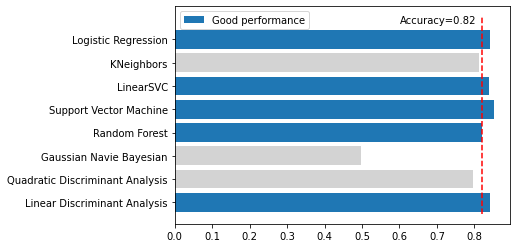

In [163]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(['Linear Discriminant Analysis',
 'Quadratic Discriminant Analysis',
 'Gaussian Navie Bayesian',
 'Random Forest',
 'Support Vector Machine',
 'LinearSVC',
 'KNeighbors',
 'Logistic Regression'])

plt.barh(x,b,color = ['tab:blue','lightgray','lightgray','tab:blue','tab:blue','tab:blue','lightgray','tab:blue'])
plt.legend(['Good performance'])
plt.plot([0.82,0.82],[-0.5,8],"r--")
plt.text(0.6,7.7,'Accuracy=0.82',fontsize=10)
plt.show()

# SVC

In [39]:
#selet best parameter of svc
a=0 plotpic
kernel=['rbf','linear','poly']
for i in kernel:
    for j in np.arange(0.1, 1.01, 0.01):
        cl=svc(C=j, kernel=i)
        model=cl.fit(X_train,Y_train)
        Error_a=accuracy_score(Y_test, model.predict(X_test))
        ROC=roc_auc_score(Y_test, model.predict(X_test))
        if a<ROC:
            a=ROC
            b=Error_a
            p=[i,j]
print(p,"accuracy score:",b,a)

['linear', 0.8699999999999996] accuracy score: 0.8723404255319149 0.7845744680851064


In [63]:
cl=svc(probability=True,kernel=p[0],C=p[1])
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC
model=cl.fit(X_train,Y_train)
Error_a=accuracy_score(Y_test, model.predict(X_test))
ROC=roc_auc_score(Y_test, model.predict(X_test))
Error_s=mean_squared_error(Y_test, model.predict(X_test))
Error_r=r2_score(Y_test, model.predict(X_test))
recall=recall_score
precision=precision_score
print("accuracy score:",Error_a)
print("roc_auc_score",ROC)
print("mean squared error:",Error_s)
print("r2 scorce:",Error_r)

accuracy score: 0.8723404255319149
roc_auc_score 0.7845744680851064
mean squared error: 0.1276595744680851
r2 scorce: 0.20212765957446832


Specificity at 80% Sensitivity = 0.771


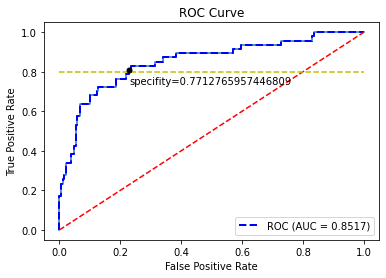

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

predict_test_value = model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, predict_test_value)

plt.plot(fpr, tpr)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b--', label='ROC (AUC = {:.4f})'.format(roc_auc), lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], "r--")

# Find specificity at sensitivity = 0.8
sensitivity_value = 0.8
for i in range(len(tpr)):
    if tpr[i]>= sensitivity_value:
        spe=1-fpr[i]
        sen=tpr[i]
        break
name='specifity='+str(spe)
print('Specificity at 80% Sensitivity = {:.3f}'.format(spe)) 
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.plot([0, 1],[0.8,0.8],"y--")
plt.plot(1-spe,sen,marker="o",markersize=5,color="black")
plt.text(1-spe,sen-0.07,name,fontsize=10)
plt.show()

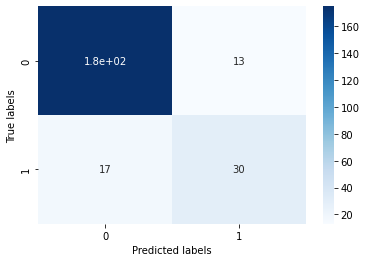

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [66]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
best_threshold = None
best_score = None
for threshold in np.arange(0, 1.01, 0.01):
    y_pred = [1 if prob >= threshold else 0 for prob in predict_test_value]
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    score = 1*sensitivity + specificity
    if best_score is None or score > best_score:
        best_score = score
        best_threshold = threshold


In [46]:
print(f'best score:{best_score}')
print(f'best threshold:{best_threshold}')

best score:1.5691489361702127
best threshold:0.0


# Random Forest Classifier

In [47]:
U=pd.concat([pd.DataFrame(X_train),pd.DataFrame(Y_train)],axis=1)

In [48]:
p_messages = U[U.iloc[:,-1] == 1]
n_messages  = U[U.iloc[:,-1] == 0]
print(p_messages.shape)
print(n_messages.shape)



(191, 228)
(745, 228)


In [49]:
#upsample the dataset
from sklearn.utils import resample
p_upsample = resample(p_messages,
             replace=True,
             n_samples=len(n_messages),
             random_state=42)

print(p_upsample.shape)

(745, 228)


In [50]:
d_RF=pd.concat([n_messages, p_upsample])
X_RF=d_RF.iloc[:,:-1]
Y_RF=d_RF.iloc[:,-1]

In [51]:
#selet best parameter of 
a2=0
estimator=[50,100,150,200]
criterion=['gini','entropy']
for i in criterion:
    for j in np.arange(50, 201, 10):
        cl=rf(n_estimators=j, criterion=i,oob_score=True,random_state=1)
        model=cl.fit(X_RF.values,Y_RF.values)
        Error_a=accuracy_score(Y_test, model.predict(X_test))
        ROC=roc_auc_score(Y_test, model.predict(X_test))
        print(i,j,"accuracy score:",Error_a,"ROC",ROC)
        if a2<ROC:
            a2=ROC
            b2=Error_a
            p2=[i,j]
print(p2,"accuracy score:",b2,a2)

gini 50 accuracy score: 0.8297872340425532 ROC 0.5904255319148937
gini 60 accuracy score: 0.825531914893617 ROC 0.571808510638298
gini 70 accuracy score: 0.825531914893617 ROC 0.571808510638298
gini 80 accuracy score: 0.825531914893617 ROC 0.571808510638298
gini 90 accuracy score: 0.825531914893617 ROC 0.571808510638298
gini 100 accuracy score: 0.825531914893617 ROC 0.571808510638298
gini 110 accuracy score: 0.825531914893617 ROC 0.571808510638298
gini 120 accuracy score: 0.825531914893617 ROC 0.571808510638298
gini 130 accuracy score: 0.8212765957446808 ROC 0.5691489361702129
gini 140 accuracy score: 0.8212765957446808 ROC 0.5691489361702129
gini 150 accuracy score: 0.8297872340425532 ROC 0.5824468085106383
gini 160 accuracy score: 0.825531914893617 ROC 0.5797872340425533
gini 170 accuracy score: 0.8212765957446808 ROC 0.5691489361702129
gini 180 accuracy score: 0.825531914893617 ROC 0.5797872340425533
gini 190 accuracy score: 0.8212765957446808 ROC 0.5691489361702129
gini 200 accurac

In [107]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
best_threshold = None
best_score = None
cl=rf(n_estimators=p2[1],criterion=p2[0],oob_score=True,random_state=1)
model=cl.fit(X_RF.values,Y_RF.values)
prob_test = model.predict_proba(X_test)#in some fitting model needs adding probability=True
predict_test_value = prob_test[:, 1]
for threshold in np.arange(0, 1.01, 0.01):
    y_pred = [1 if prob >= threshold else 0 for prob in predict_test_value]
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    score = 1*sensitivity + specificity
    if best_score is None or score > best_score:
        best_score = score
        best_threshold = threshold
print(f'best score:{best_score}')
print(f'best threshold:{best_threshold}')

best score:1.606382978723404
best threshold:0.29


In [115]:
cl=rf(n_estimators=p2[1],criterion=p2[0],oob_score=True,random_state=1)
model=cl.fit(X_RF.values,Y_RF.values)
#threshold = best_threshold
#predicted_proba = model.predict_proba(X_test)
#predicted = (predicted_proba [:,1] >= threshold).astype('int')
predicted = model.predict(X_test)
accuracy = accuracy_score(Y_test, predicted)
Error_a=accuracy_score(Y_test, predicted)
Error_s=mean_squared_error(Y_test, predicted)
Error_r=r2_score(Y_test, predicted)
print("roc_auc_score",roc_auc_score(Y_test, predicted))
print("accuracy score:",Error_a)
print("mean squared error:",Error_s)
print("r2 scorce:",Error_r)

roc_auc_score 0.625
accuracy score: 0.8468085106382979
mean squared error: 0.15319148936170213
r2 scorce: 0.042553191489361875


Specificity at 80% Sensitivity = 0.7979


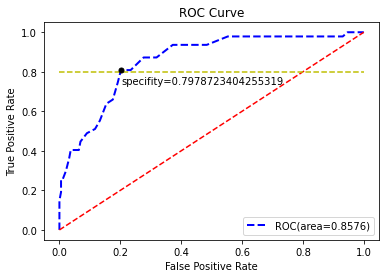

In [116]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

prob_test = model.predict_proba(X_test)#in some fitting model needs adding probability=True
predict_test_value = prob_test[:, 1]
fpr,tpr,thersholds=roc_curve(Y_test,predict_test_value)
#fpr,tpr,thersholds=roc_curve(Y_test,model.predict(X_test))

#print(f'FRP:{fpr[i]}',f'TRP:{tpr[i]}',f'Prob:{value}')
#for i,value in enumerate(thersholds):
    #print("%f %f %f" % (fpr[i],tpr[i],value))
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'b--',label='ROC(area={0:.4f})'.format(roc_auc),lw=2)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], "r--")

# Find specificity at sensitivity = 0.8
sensitivity_value = 0.8
for i in range(len(tpr)):
    if tpr[i]>= sensitivity_value:
        spe=1-fpr[i]
        sen=tpr[i]
        break
name='specifity='+str(spe)
print('Specificity at 80% Sensitivity = {:.4f}'.format(spe)) 
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.plot([0, 1],[0.8,0.8],"y--")
plt.plot(1-spe,sen,marker="o",markersize=5,color="black")
plt.text(1-spe,sen-0.07,name,fontsize=10)
plt.show()

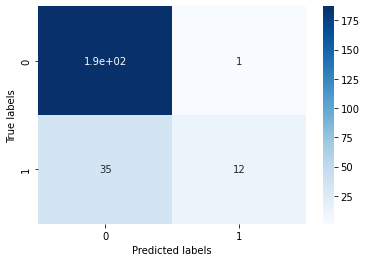

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [51]:
'''
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# create the base models
rf = RandomForestClassifier(max_depth=30, random_state=17)
xgb_model = xgb.XGBClassifier(max_depth=5, n_estimators=100, random_state=17)
ada = AdaBoostClassifier(n_estimators=100, random_state=17)

# create the voting classifier
voting = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb_model), ('ada', ada)], voting='soft')

# fit the voting classifier to the training data
voting.fit(X_train, Y_train)

# make predictions on the test data
y_pred_proba = voting.predict_proba(X_test)[:, 1]

# compute the evaluation metrics
auc = roc_auc_score(Y_test, y_pred_proba)
y_pred = [1 if prob >= 0.3 else 0 for prob in y_pred_proba]
acc = accuracy_score(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# print the evaluation metrics
print("AUC score: ", auc)
print("Accuracy score: ", acc)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)
'''

'\nfrom sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier\nimport xgboost as xgb\nfrom sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix\n\n# create the base models\nrf = RandomForestClassifier(max_depth=30, random_state=17)\nxgb_model = xgb.XGBClassifier(max_depth=5, n_estimators=100, random_state=17)\nada = AdaBoostClassifier(n_estimators=100, random_state=17)\n\n# create the voting classifier\nvoting = VotingClassifier(estimators=[(\'rf\', rf), (\'xgb\', xgb_model), (\'ada\', ada)], voting=\'soft\')\n\n# fit the voting classifier to the training data\nvoting.fit(X_train, Y_train)\n\n# make predictions on the test data\ny_pred_proba = voting.predict_proba(X_test)[:, 1]\n\n# compute the evaluation metrics\nauc = roc_auc_score(Y_test, y_pred_proba)\ny_pred = [1 if prob >= 0.3 else 0 for prob in y_pred_proba]\nacc = accuracy_score(Y_test, y_pred)\ntn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()\nsensitivity = tp / (tp + f

# LDA

In [110]:
#selet best parameter of svc
a3=0
solver=['svd','lsqr']
for i in solver:
    for j in np.arange(0, 2, 1):
        cl=lda(solver=i, n_components=j)
        model=cl.fit(X_train,Y_train)
        Error_a=accuracy_score(Y_test, model.predict(X_test))
        ROC=roc_auc_score(Y_test, model.predict(X_test))
        print(i,j,"accuracy score:",Error_a,"ROC",ROC)
        if a3<ROC:
            a3=ROC
            b3=Error_a
            p3=[i,j]
            
print(p3,"accuracy score:",b3,a3)

svd 0 accuracy score: 0.8425531914893617 ROC 0.7420212765957447
svd 1 accuracy score: 0.8425531914893617 ROC 0.7420212765957447
lsqr 0 accuracy score: 0.8212765957446808 ROC 0.6888297872340425
lsqr 1 accuracy score: 0.8212765957446808 ROC 0.6888297872340425
['svd', 0] accuracy score: 0.8425531914893617 0.7420212765957447


In [111]:
cl=lda(solver=p3[0], n_components=p3[1])
model=cl.fit(X_train,Y_train)
Error_a=accuracy_score(Y_test, model.predict(X_test))
ROC=roc_auc_score(Y_test, model.predict(X_test))
Error_s=mean_squared_error(Y_test, model.predict(X_test))
Error_r=r2_score(Y_test, model.predict(X_test))
recall=recall_score
precision=precision_score
print("accuracy score:",Error_a)
print("roc_auc_score",ROC)
print("mean squared error:",Error_s)
print("r2 scorce:",Error_r)

accuracy score: 0.8425531914893617
roc_auc_score 0.7420212765957447
mean squared error: 0.1574468085106383
r2 scorce: 0.015957446808510856


Specificity at 80% Sensitivity = 0.686


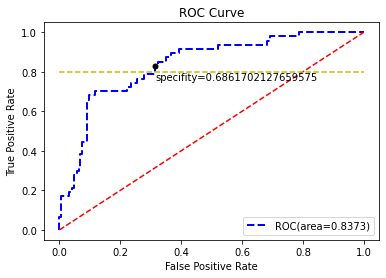

In [112]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

prob_test = model.predict_proba(X_test)#in some fitting model needs adding probability=True
predict_test_value = prob_test[:, 1]
fpr,tpr,thersholds=roc_curve(Y_test,predict_test_value)
#fpr,tpr,thersholds=roc_curve(Y_test,model.predict(X_test))

#print(f'FRP:{fpr[i]}',f'TRP:{tpr[i]}',f'Prob:{value}')
#for i,value in enumerate(thersholds):
    #print("%f %f %f" % (fpr[i],tpr[i],value))
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,'b--',label='ROC(area={0:.4f})'.format(roc_auc),lw=2)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], "r--")

# Find specificity at sensitivity = 0.8
sensitivity_value = 0.8
for i in range(len(tpr)):
    if tpr[i]>= sensitivity_value:
        spe=1-fpr[i]
        sen=tpr[i]
        break
name='specifity='+str(spe)
print('Specificity at 80% Sensitivity = {:.3f}'.format(spe)) 
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.plot([0, 1],[0.8,0.8],"y--")
plt.plot(1-spe,sen,marker="o",markersize=5,color="black")
plt.text(1-spe,sen-0.07,name,fontsize=10)
plt.show()

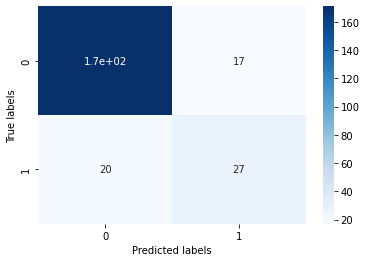

In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()